In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error
import seaborn as sn
%matplotlib inline

In [2]:
# #Load data from URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# data = pd.read_csv(url,
#                    names= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
#                            'race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income_class'])

# # Save data to CSV file
# data.to_csv('adult_data.csv', index=False)


In [3]:
# Read data from CSV file
data = pd.read_csv('adult_data.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [5]:
# Check for missing values
data.isnull().sum()   #no missing values itseems

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_class      0
dtype: int64

In [6]:
data['income_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_class, dtype: int64

In [7]:
# Create target column using boolean indexing for target
data['target'] = (data['income_class'] == ' >50K').astype(int)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [9]:
# Replace '?' values with mode value in workclass column
# mode_value = data['workclass'].mode()[0]
# data['workclass'] = data['workclass'].replace(' ?', mode_value)

In [10]:
# Drop rows with '?' values in workclass column
data = data[data['workclass'] != ' ?']
data = data[data['occupation'] != ' ?']

In [11]:
# seeing which options are the most frequent. Those that are will be reference points
print(data['workclass'].value_counts())
print(data['education'].value_counts())
print(data['marital-status'].value_counts())
print(data['occupation'].value_counts())
print(data['relationship'].value_counts())
print(data['race'].value_counts())
#'workclass_Private', "education_HS-grad", "marital-status_Married-civ-spouse", "occupation_Prof-specialty", "relationship_Husband", "race_White"

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9968
 Some-college    6775
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64
 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Othe

In [12]:
#create dataframe of dummy variables
diff = data[['workclass','education','marital-status','occupation','relationship','race']]
data_onehot_df = pd.get_dummies(diff, prefix=['workclass','education','marital-status','occupation','relationship','race'])

In [13]:
data_onehot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [14]:
#redundant variables
data.drop(['fnlwgt', "education-num"],axis=1, inplace=True)

In [15]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [16]:
data['native-country'].value_counts
data['native-country'] = data['native-country'].astype(str)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [17]:
# If American = 1, idividual is from USA. Else, it is 0.
data["American"] = np.where(data["native-country"] == " United-States", 1,0)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target,American
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


In [18]:
# combine dummy variables with original data frame
data_concat = pd.concat([data, data_onehot_df], axis=1)
data_concat

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
# Drop variables that were one hot encoded
data_concat.drop(['workclass', "education", "marital-status", "relationship", "occupation", "race", "sex", "native-country", "income_class"],axis=1, inplace=True)
data_concat = data_concat.reset_index(drop = True)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
# standardizing the quantatative variables. Sets their mean equal to 0, stddev = 1

data_concat2 = data_concat.iloc[:, :4]
data_concat_scaled = pd.DataFrame(scaler.fit_transform(data_concat2))
data_concat_scaled.rename(columns={0: "age", 1: "capital-gain", 2 : "capital-loss", 3 : "hours-per-week"}, inplace = True)
data_concat_scaled.reset_index(drop = True)
data_concat_scaled

data_concat["age"] = data_concat_scaled["age"]
data_concat["capital-gain"] = data_concat_scaled["capital-gain"]
data_concat["capital-loss"] = data_concat_scaled["capital-loss"]
data_concat["hours-per-week"] = data_concat_scaled["hours-per-week"]
data_concat

,age,capital-gain,capital-loss,hours-per-week,target,American,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042416,0.142438,-0.219179,-0.079207,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880958,-0.147516,-0.219179,-2.331988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033815,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.109651,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.796125,-0.147516,-0.219179,-0.079207,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,-0.872356,-0.147516,-0.219179,-0.246080,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
30714,0.118647,-0.147516,-0.219179,-0.079207,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30715,1.490806,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
30716,-1.253512,-0.147516,-0.219179,-1.747934,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
import time
start_time = time.time()

y_pre = data_concat.drop(['target', 'workclass_ Private', "education_ HS-grad", "marital-status_ Married-civ-spouse", "occupation_ Prof-specialty", "relationship_ Husband", "race_ White"],axis=1)
X = np.array(y_pre)
Y = np.array(data_concat.target)

scores = []
for i in range(100):
    X_train100, X_test100, Y_train100, Y_test100 = train_test_split(X, Y, test_size=0.2, random_state=i)

    clf = LogisticRegression(random_state=i, max_iter=1000)
    clf.fit(X_train100,Y_train100)

    scores.append(clf.score(X_test100, Y_test100))
    
print(np.mean(scores))

print("--- %s seconds ---" % (time.time() - start_time))

0.8467333984375
--- 25.480034589767456 seconds ---


Simulating 100 different 80-20 train-test splits and averaging the testing results produces an accuracy of 84.67%. This shows that our below singular model is not a fluke

<Axes: >

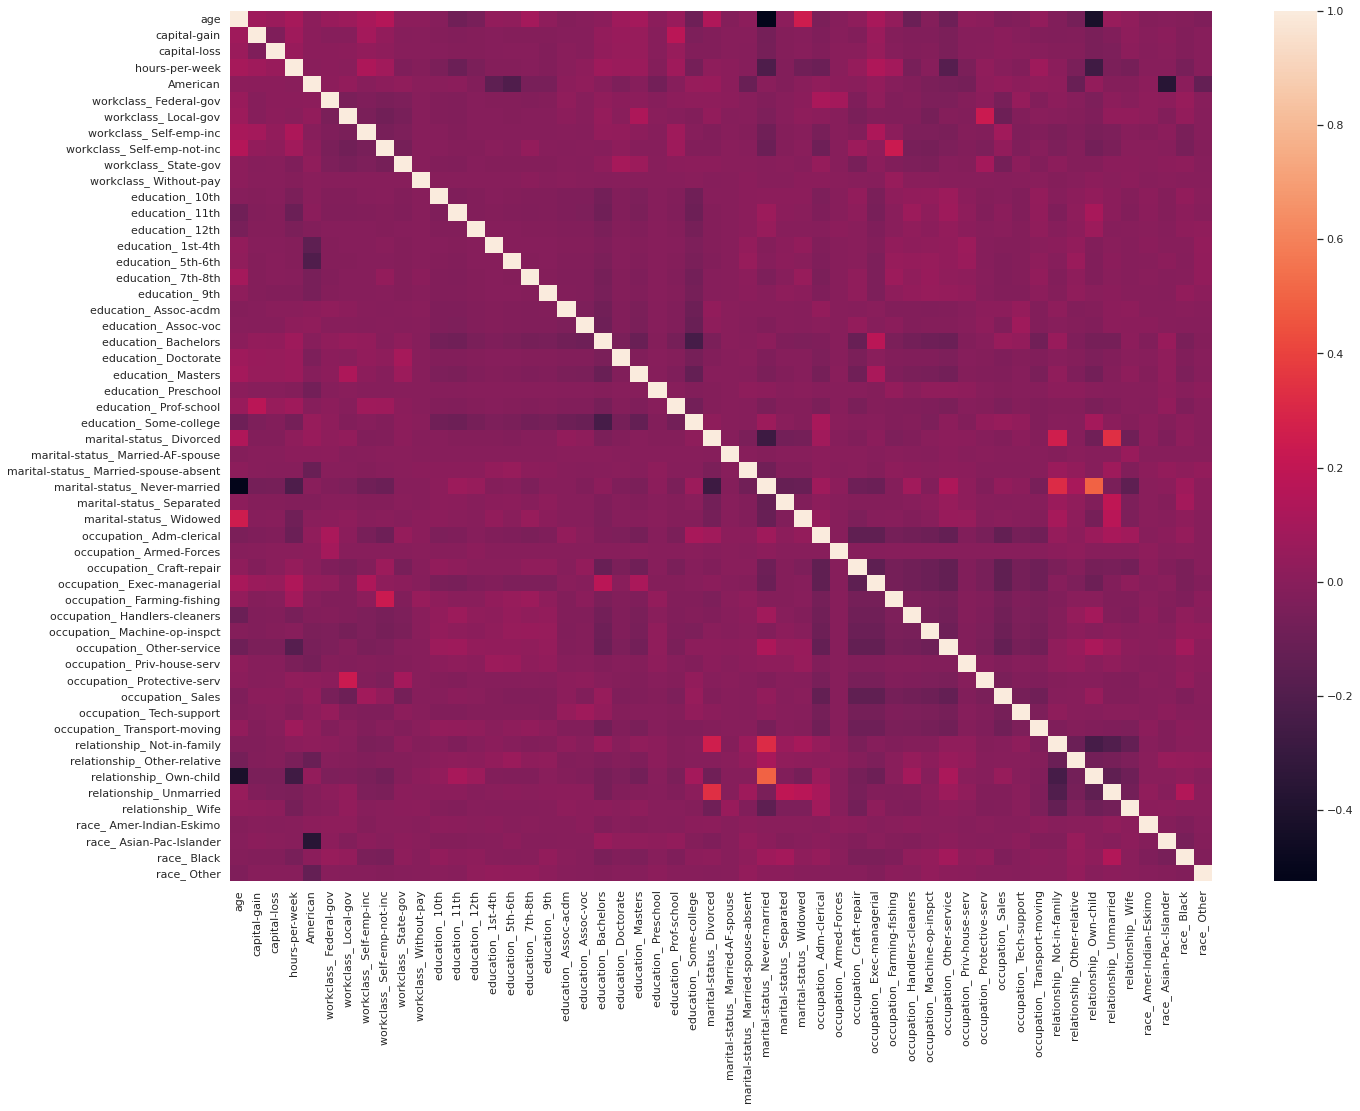

In [23]:

sn.set(rc={'figure.figsize':(22,16)})
corr_matrix = y_pre.corr()
sn.heatmap(corr_matrix)

We can see in the correlation matrix of our predictors that none of them are very strongly correlated with one another. This is important to check to avoid bias and multicolinearity

In [24]:
# splitting the data, training a logistic rggression model, testing it on 20% of the data
# achieves 84.6% accuracy
# can and will be fine tuned

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=48825)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=48825)

clf_with_imbalance = LogisticRegression(random_state=0, max_iter=1000, class_weight={0:0.25,1:0.75})
clf_without_imbalance = LogisticRegression(random_state=0, max_iter=1000)
clf_with_imbalance.fit(X_train,y_train)
clf_without_imbalance.fit(X_train,y_train)

print("Accuracy without imbalance: ",clf_without_imbalance.score(X_val, y_val))
y_pred = clf_without_imbalance.predict(X_val)
print("F1 Score without imbalance: ",f1_score(y_pred, y_val))

print("Accuracy with imbalance: ",clf_with_imbalance.score(X_val, y_val))
y_pred = clf_with_imbalance.predict(X_val)
print("F1 Score with imbalance: ",f1_score(y_pred, y_val))

Accuracy without imbalance:  0.8450520833333334
F1 Score without imbalance:  0.6560693641618498
Accuracy with imbalance:  0.8079427083333334
F1 Score with imbalance:  0.6800433839479394


In [25]:
print(pd.DataFrame(y_train).value_counts(normalize=True))
print(pd.DataFrame(y_test).value_counts(normalize=True))
print(pd.DataFrame(y_val).value_counts(normalize=True))

0    0.750956
1    0.249044
dtype: float64
0    0.74707
1    0.25293
dtype: float64
0    0.754883
1    0.245117
dtype: float64


Our data is imbalanced as about 75% of individuals did not earn over 50k per year. We will add an option to account for this imbalance in our GridSearch

We can see that adjusting for the weight imbalance does affect our model

In [26]:
cv = KFold(n_splits=10, random_state=48824, shuffle=True)
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.847 (0.009)


Conducting a 10 fold CV produces an accuracy of 84.7%. For this project we were asked to use train-evaluation-test as our data splitting technique. However, we decided it would be worth looking at K-Folds CV as it is often viewed more accurate. We will use our validation set moving forward

In [27]:
weights = np.linspace(0.0,0.99,200)
weight_options = [{0:x ,1:1.0 -x} for x in weights]
weight_options.append("balanced")

The below cell was ran with the above combination of weights, which took a very long time to process. The results showed that a 49-51 class weight produced the optimal parameters. For sake of simplicity and speed, our final code only includes 49-51, balances, and 25-75 as options. 

In [28]:
# Figuring out the optimal parameters for our model
weights = np.linspace(0.0,0.99,200)

param_grid_lr = {
    'max_iter': [2500, 5000, 7500, 10000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    "C" : [1,5,10,100,1000],
    'class_weight': ["balanced", {0:49, 1:51}, {0:25, 1:75}]}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=48824), param_grid=param_grid_lr, verbose=1, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)
y_pred = logModel_grid.predict(X_val)
print(confusion_matrix(y_val, y_pred), ": is the confusion matrix \n")
print("Accuracy: ",accuracy_score(y_val, y_pred), ": is the accuracy score")
print("F1 Score: ",f1_score(y_val, y_pred))

#https://medium.com/analytics-vidhya/how-to-improve-logistic-regression-b956e72f4492
# above source details how to search for optimal parameters
# In this case, it produced worse results than our other models

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
LogisticRegression(C=1, class_weight={0: 49, 1: 51}, max_iter=2500,
                   random_state=48824)
[[2133  186]
 [ 293  460]] : is the confusion matrix 

Accuracy:  0.8440755208333334 : is the accuracy score
F1 Score:  0.6576125804145818


In Logistic Regression, the most important predictors are the ones with the largest absolute coefficients. The below code highlights the magnitude of each of the coefficients

In [29]:
importances = pd.DataFrame(data={
    'Attribute': y_pre.columns,
    'Importance': clf.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

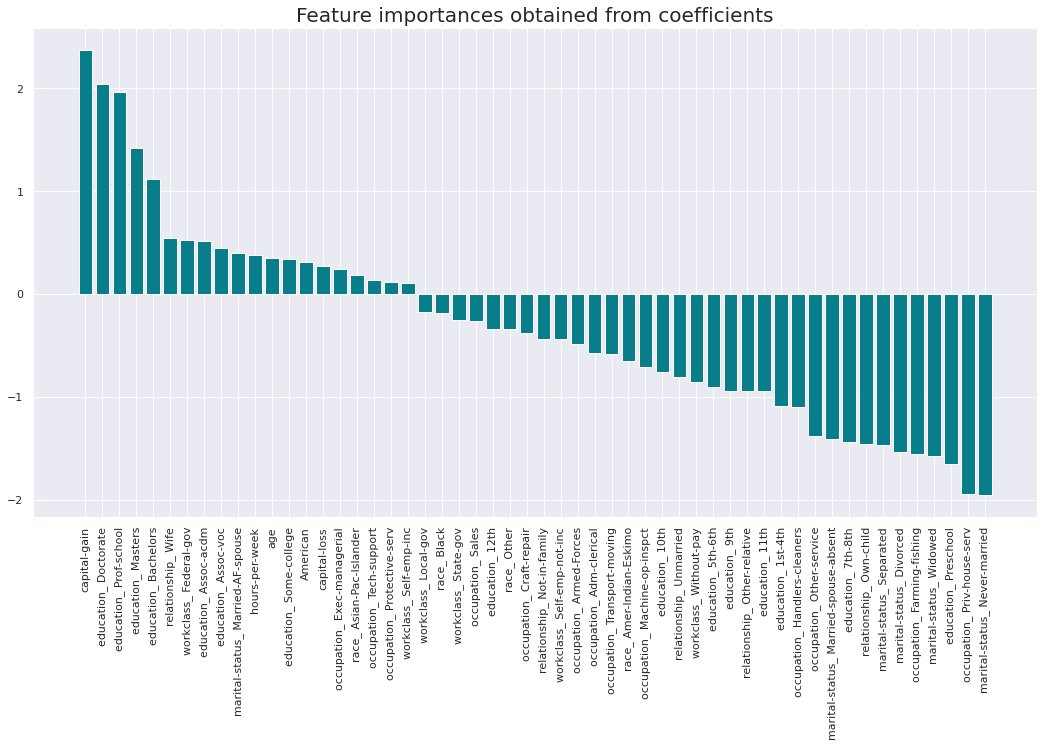

In [30]:
# Visualizing the coefficients 

plt.figure(figsize = (18,9))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#https://betterdatascience.com/feature-importance-python/#:~:text=Probably%20the%20easiest%20way%20to,assigned%20to%20each%20input%20value.
# above source inspired graph and how to create it

In [31]:
importances2 = pd.DataFrame(data={
    'Attribute': y_pre.columns,
    'Importance': abs(clf.coef_[0])
})
importances2 = importances2.sort_values(by='Importance', ascending=False)

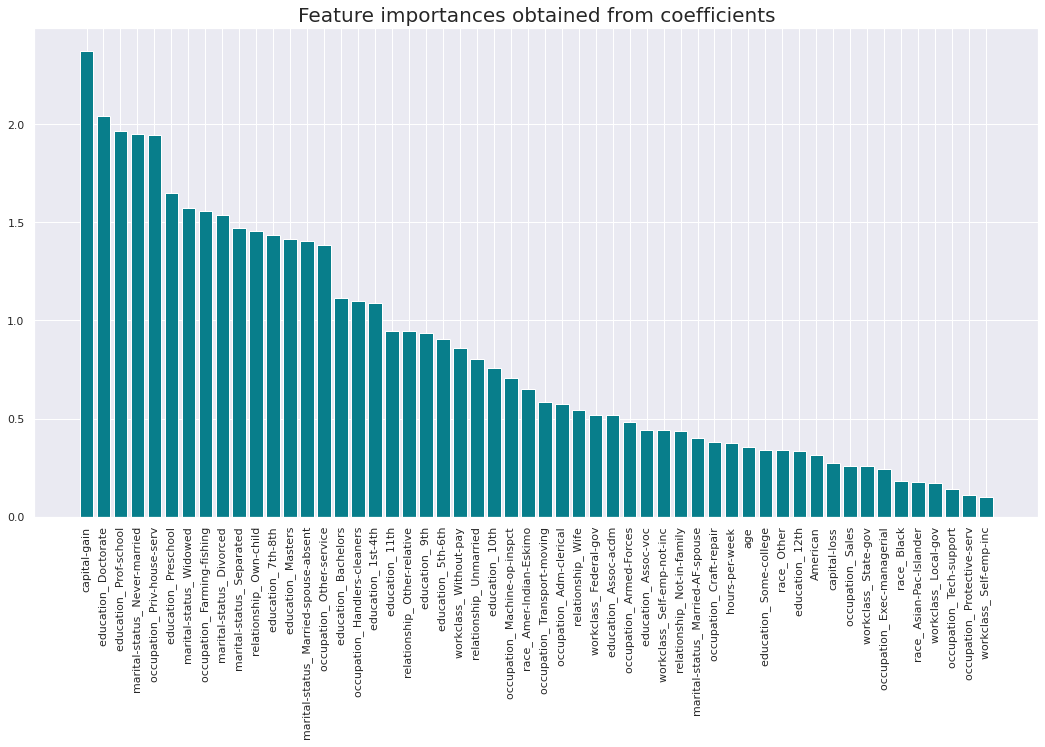

In [32]:
# Visualizing the absolute values of the coefficients 
plt.figure(figsize = (18,9))
plt.bar(x=importances2['Attribute'], height=importances2['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Feature Evaluation and Selection

In logistic regression where the features are standardized, the effect of the predictors is reflected in the size of their coefficient. For our Logistic Regression model, some of the strongest predictors are found to be capital_gain, education_Doctorate, and marital_status_never_married. 

In selecting which features to use for a Logistic Regression model, one must first consider the practical implications of adding/removing features within the context of their problem. This model consists modtly of dummyt variables for categorical features. As such, it wouldn't make practical sense to remove some of them and not others as the removed ones still provide valuable information about the individuals being classified. Thus, we will retain all of our features.

# Final Test

In [33]:
y_pred = logModel_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))

[[2137  158]
 [ 315  462]] : is the confusion matrix 

Accuracy:  0.8460286458333334
F1 Score:  0.6614173228346456


Our final model achieves 84.6% accuracy with an F1 score of 0.6614. Given the nature of our problem, our methodology optimized the F1 Score rather than accuracy